<a href="https://colab.research.google.com/github/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antes de iniciar...

¿Donde me encuentro, qué archivos hay, cuanto pesa la carpeta?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/2023_2/UNMSM/Cl1y2_repaso

/content/drive/MyDrive/2023_2/UNMSM/Cl1y2_repaso


In [3]:
!du -hs

2.3M	.


In [4]:
!ls

ch1_basic_python-practice_problems.ipynb  Python_para_quimica_2023.ipynb
prueba1.ipynb


Operaciones

In [5]:
5*7 #multiplicación

35

In [6]:
5**7 #exponenciación

78125

In [7]:
20/3 #división

6.666666666666667

In [8]:
20%3 #resto

2

In [9]:
20//3 #cociente

6

https://dontpad.com/repaso1_quimica_2023

# Nivel 1: Visualización 2D de moléculas | SMILES

RDKit es una colección de programas de quimioinformática y aprendizaje automático escrito en C++ y Python, disponible en https://github.com/rdkit/rdkit

Fue desarrollado y usado en descubrimiento racional de fármacos desde el año 2000 para construir modelos predictivos para ADME, Tox, actividad biológica, etc. En el 2006 se disponibilizo mediante código abierto y su desarrollo continúa con la contribución de Novartis.

La documentación se encuentra disponible en https://www.rdkit.org/docs/index.html

RDKit provee varias funciones para representar las moléculas en código SMILES

Instalamos RDKit para visualizar las moléculas representadas en SMILES

In [ ]:
!pip install rdkit

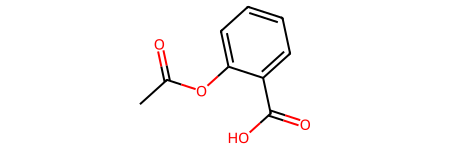

In [14]:
from rdkit.Chem import MolFromSmiles

mi_molecula = 'O=C(Oc1ccccc1C(=O)O)C'
MolFromSmiles(mi_molecula)

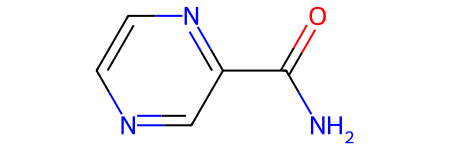

In [27]:
# Dibujar la molécula de pirazinamida

MolFromSmiles('c1nccnc1C(=O)N')

Visualización de un grupo de moléculas

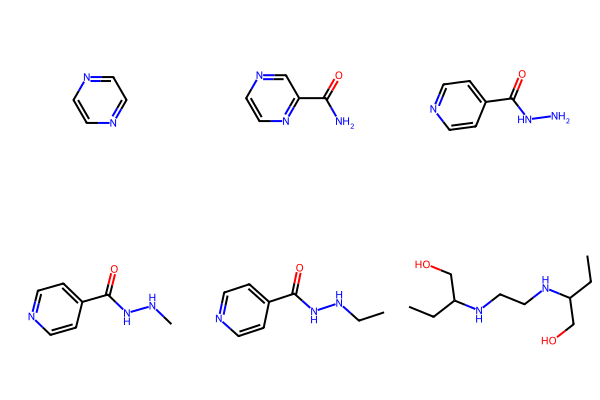

In [28]:
from rdkit import Chem
from rdkit.Chem import Draw

antiTBC = ['c1nccnc1','c1(C(=O)N)nccnc1','C1=CN=CC=C1C(=O)NN','C1=CN=CC=C1C(=O)NNC', 'C1=CN=CC=C1C(=O)NNCC','CCC(CO)NCCNC(CC)CO']
mol_lista = []

for i in antiTBC:
  mol = Chem.MolFromSmiles(i)
  mol_lista.append(mol)
Draw.MolsToGridImage(mol_lista)

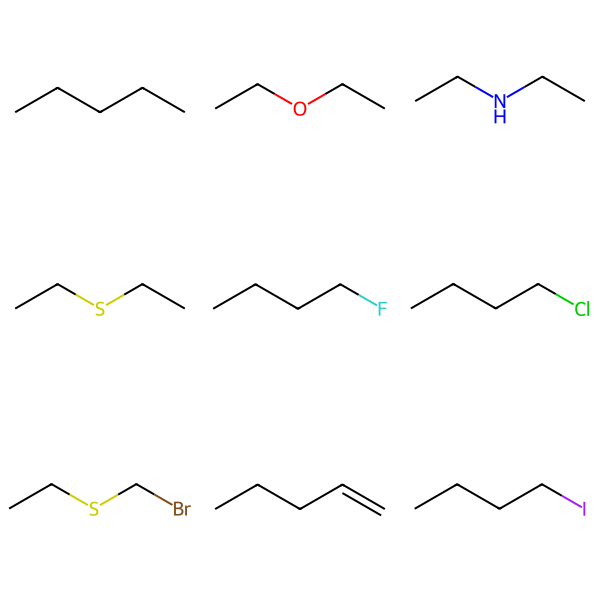

In [30]:
smiles_list = ['CCCCC', 'CCOCC','CCNCC',
               'CCSCC','CCCCF','CCCCCl',
               'CCSCBr','CCCC(=C)','CCCCI']

#Ahora usando "list comprehension"
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

imagen = Draw.MolsToGridImage(mol_list)
imagen

Nociones de isomería

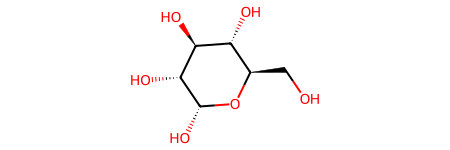

In [31]:
# SMILES de alpha-D-glucose
from rdkit.Chem import MolFromSmiles

alpha_d_glucose = 'O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'
MolFromSmiles(alpha_d_glucose)

# Nivel 2: Masa molecular

In [32]:
from rdkit.Chem import Descriptors

glucosa = Chem.MolFromSmiles(alpha_d_glucose)
mw_glucosa= Descriptors.MolWt(glucosa)
mw_glucosa

180.15599999999998

In [33]:
mw_glucosa_smiles = Descriptors.MolWt(Chem.MolFromSmiles('O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'))
mw_glucosa_smiles

180.15599999999998

¿Cuál es la masa molecular del etanol?

In [34]:
mw_etanol_smiles = Descriptors.MolWt(Chem.MolFromSmiles('CCO'))
mw_etanol_smiles

46.069

# Nivel 3: Mi propia tabla periódica

RDKit posee también información por elementos, veamos como gestionar estos datos para construir un DataFrame

In [35]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()

In [ ]:
# ¿Qué es PeriodicTable?
help(PeriodicTable)

In [45]:
# Podemos generar una lista de elementos

element_symbols = []

for i in range(1,11):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))

In [46]:
#Imprimimos la lista generada
element_symbols

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne']

In [52]:
# ¿Qué información tenemos? Probemos
# PeriodicTable.

In [53]:
PeriodicTable.GetAtomicNumber('C')

6

In [54]:
PeriodicTable.GetAtomicWeight('He')

4.003

In [55]:
PeriodicTable.GetValenceList(13)[0]

3

In [56]:
PeriodicTable.GetMostCommonIsotope('C')

12

In [57]:
PeriodicTable.GetMassForIsotope('C',14)

14.00324199

In [61]:
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
masa_atomica

[1.008, 4.003, 6.941, 9.012, 10.812, 12.011, 14.007, 15.999, 18.998, 20.18]

In [62]:
# Guardemos estas informaciones en listas
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,11)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,11)]

In [64]:
import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data)
df

,nombre,simbolo,masa_atomica,numero_atomico,valencias
0,Hydrogen,H,1.008,1,[1]
1,Helium,He,4.003,2,[0]
2,Lithium,Li,6.941,3,"[1, -1]"
3,Beryllium,Be,9.012,4,[2]
4,Boron,B,10.812,5,[3]
5,Carbon,C,12.011,6,[4]
6,Nitrogen,N,14.007,7,[3]
7,Oxygen,O,15.999,8,[2]
8,Fluorine,F,18.998,9,[1]
9,Neon,Ne,20.180,10,[0]


Pandas y RDKit

In [65]:
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
antibiotics = pd.DataFrame(columns=['Name','Smiles'])
antibiotics = pd.concat([antibiotics, pd.DataFrame.from_records([{'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
  'Name':'Penicilline G'}])], ignore_index=True) #Penicilline G
antibiotics = pd.concat([antibiotics,pd.DataFrame.from_records([{
  'Smiles':'CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O',
  'Name':'Tetracycline'}])], ignore_index=True) #Tetracycline
antibiotics = pd.concat([antibiotics,pd.DataFrame.from_records([{
  'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)O)C',
  'Name':'Ampicilline'}])], ignore_index=True) #Ampicilline
#print([str(x) for x in  antibiotics.columns])
#['Name', 'Smiles']
antibiotics

,Name,Smiles
0,Penicilline G,CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C
1,Tetracycline,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...
2,Ampicilline,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...


# Nivel 4: Ejercicios

## Ejercicio 1: Cálculo de masas

**A**. Se muestra una reacción de acoplamiento cruzado de Suzuki para sintetizar *(E)*-2-metil-2,4-nonadieno [1]. Calcule la masa de cada reactivo/catalizador que se debe agregar para llevar a cabo la reacción para $1.0 mmol$.

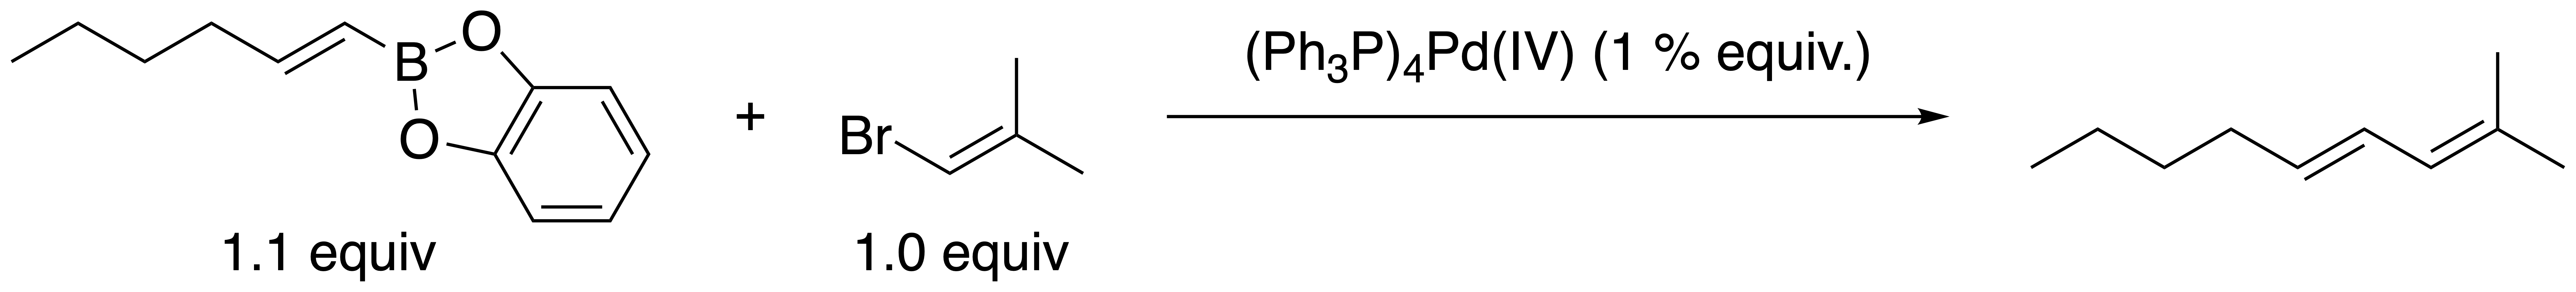

### Solución



In [67]:
# Dato: masas moleculares
benzodioxaborole_mw = 202.06 # g/mol
bromopropene_mw = 135.00 # g/mol
pd_catalyst_mw = 1155.59 # g/mol

milimoles = 1.0 # mmol

# equivalencia:

benzodioxaborole_equiv = 1.1
bromopropene_equiv = 1.0
pd_catalyst_equiv = 0.01

In [68]:
# Empleamos: masa=moles*equivalentes*masa_molecular
# para calcular la masa para cada uno:

benzodioxaborole_mass = milimoles * benzodioxaborole_equiv * benzodioxaborole_mw
bromopropene_mass = milimoles * bromopropene_equiv * bromopropene_mw
pd_catalyst_mass = milimoles * pd_catalyst_equiv * pd_catalyst_mw

In [69]:
print('benzodioxaborole: %.2f mg' %benzodioxaborole_mass)
print('bromopropene: %.2f mg' %bromopropene_mass)
print('pd_catalyst: %.2f mg' %pd_catalyst_mass)

benzodioxaborole: 222.27 mg
bromopropene: 135.00 mg
pd_catalyst: 11.56 mg


## Ejercicio 2: Velocidad de reacción

<img src='https://microbenotes.com/wp-content/uploads/2018/10/The-Michaelis%E2%80%93Menten-model.jpg'>

**B**. La enzima L-arabinosa reductasa LarA de *Aspergillus niger* cataliza la reducción de L-arabinosa a L-arabitol. El ensayo de actividad de LarA con L-arabinosa como sustrato sigue la cinética de Michaelis-Menten con un $K_m$ de $54 mM$. [2] Un ensayo con $0.72 mg$ de enzima y $10 mM$ de L-arabinosa mostró una velocidad de $3.4 unidades$. Calcula $V_{max}$ y $k_{cat}$. Algunas ecuaciones se enumeran a continuación."


Ecuación de Michaelis-Menten

$$
    v = \frac{V_{max}[S]}{K_m + [S]}
$$

for which:
- $v$: velocidad de reacción
- $V_{max}$: velocidad en exceso del substrato
- $K_m$: Constante de Michaelis-Menton
- $[S]$: Concentración de substrato

turnover number (número de recambio)

$$
    V_{max} = k_{cat}[E]
$$

for which:
- $k_{cat}$: turnover number (número de recambio)
- $[E]$: concentración de la enzima


In [ ]:
# assign known values to variables

# solve for Vmax

# solve for kcat


## Ejercicio 3: Detección de clorofila con la Ley de Beer-Lambert

**C**. Suppose we are quantifying chlorophyll a concentration in environmental samples. The specific absorption coefficient $\epsilon$ was previously determined as $84.3 \frac{L}{g \cdot cm}$ at $664 nm$ for organic extract of chlorophyll a. \[3\] A $5mL$ water sample was extracted in ether to a final volume of $13 mL$, and yielded an absorbance of $0.31$ units at $664 nm$ with $1cm$ path length. Use the Beer-Lambert law to estimate the chlorophyll a concentration.


In [ ]:
# assign known values to variables

# after writing out how to solve the problem, add comments
# to describe the steps to arrive to the original chlorophyll a concentration
# then write code under the comments.


## Ejercicio 4: Influencia de CO2 en la acidez del agua

**D**. Atmospheric carbon dioxide level is estimated to have risen by over $100 ppm$ since the industrial revolution. Aqueous carbon dioxide is in equilibrium with aqueous carbonic acid, thus an increase in atmospheric carbon dioxide can lower the pH of water. Acidification of the ocean is a concern for marine ecosystems because shells and skeletons of marine organisms in coral reefs, which are made of calcium carbonate, can dissolve at lower pH levels. \[4\] Calculate the change in pH in pure water exposed to the atmosphere due to the increase of $CO_2$ level from $280 ppm$ to $380 ppm$. Assume The dissociation from bicarbonate to carbonate is negligible. Relevant equilibrium constants are given.

Henry's Law

$$
    [gas] = \frac{P}{K_H}
$$

- $P$: pressure
- $K_H$: Henry's Law constant for carbon dioxide ($29.41\frac{atm}{M}$)


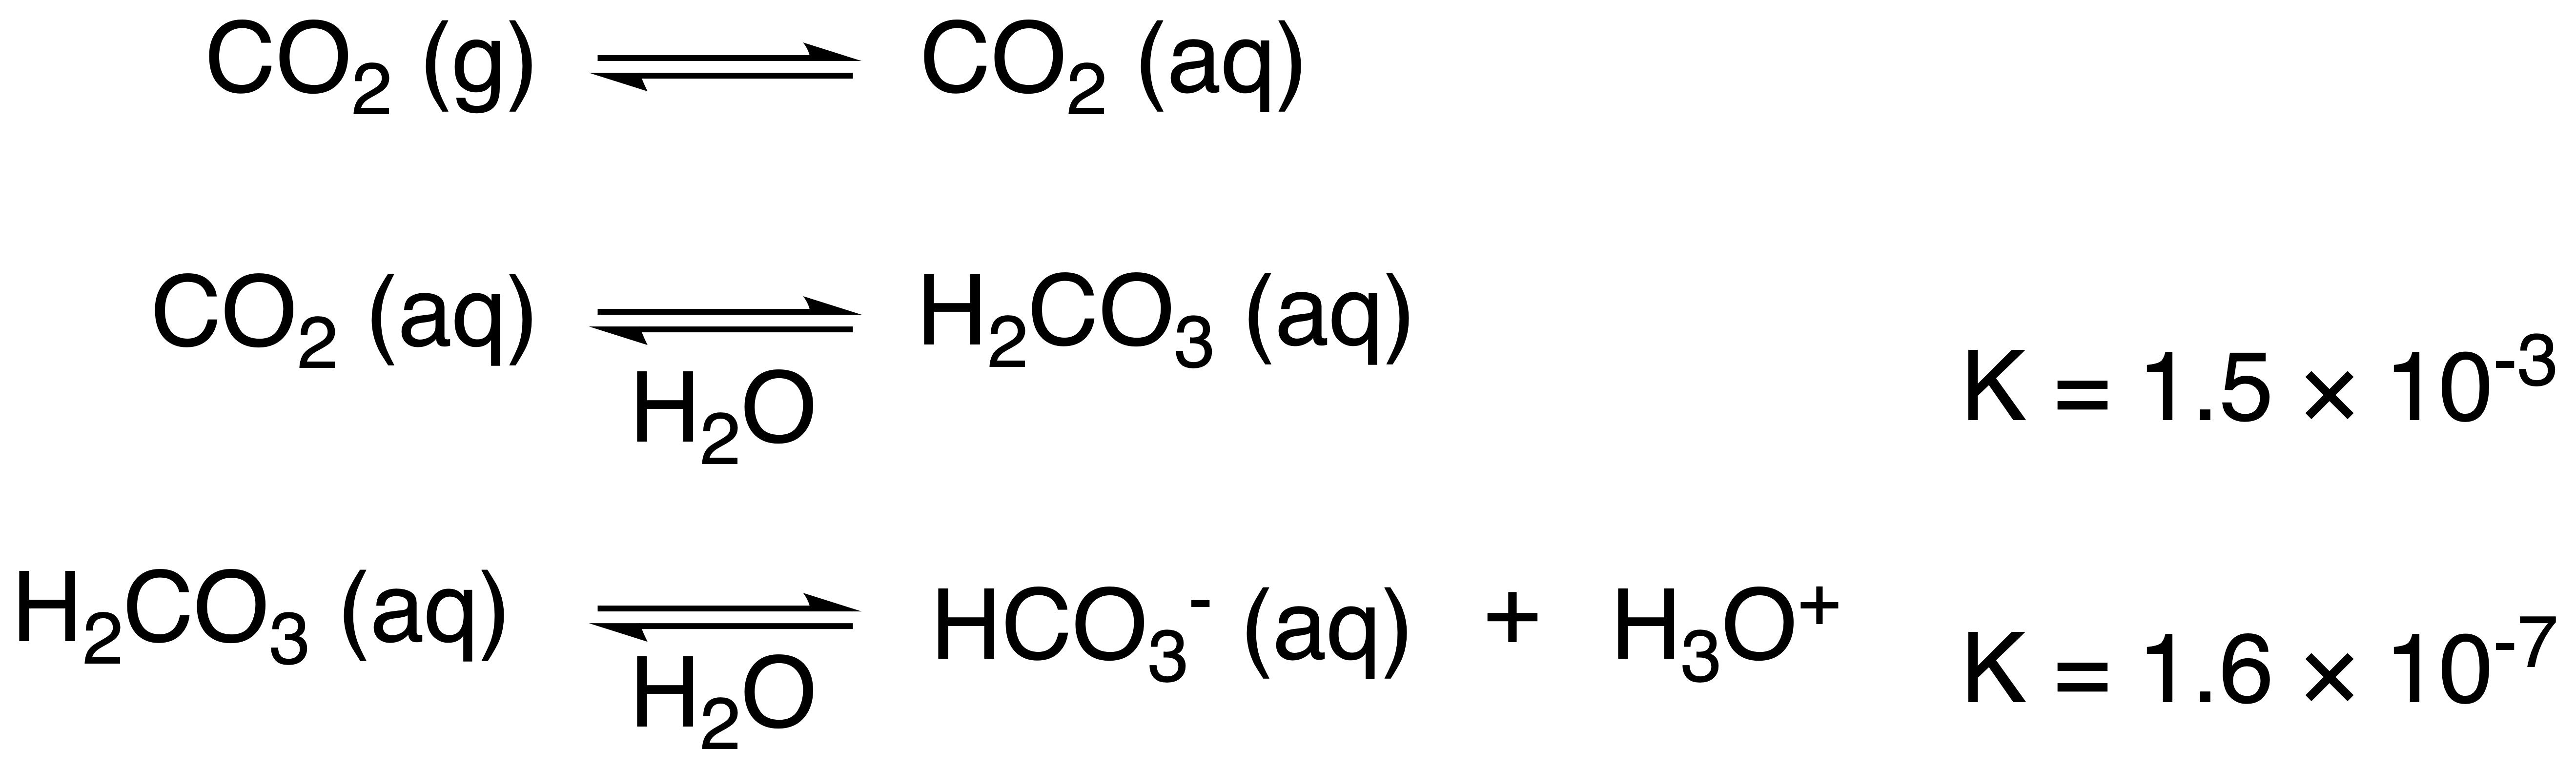

In [ ]:
# write your code


# Nivel 5

## String Operations

**A**. The gene sequence of the sense strand (coding side) encoding for RFP was given. \[5\] Print the antisense strand (reverse complement) of the whole open reading frame.

In [ ]:
rfp = 'agtttcagccagtgacagggtgagctgccaggtattctaacaagatgagttgttccaagaatgtgatcaaggagttcatgaggttcaaggttcgtatggaaggaacggtcaatgggcacgagtttgaaataaaaggcgaaggtgaagggaggccttacgaaggtcactgttccgtaaagcttatggtaaccaagggtggacctttgccatttgcttttgatattttgtcaccacaatttcagtatggaagcaaggtatatgtcaaacaccctgccgacataccagactataaaaagctgtcatttcctgagggatttaaatgggaaagggtcatgaactttgaagacggtggcgtggttactgtatcccaagattccagtttgaaagacggctgtttcatctacgaggtcaagttcattggggtgaactttccttctgatggacctgttatgcagaggaggacacggggctgggaagccagctctgagcgtttgtatcctcgtgatggggtgctgaaaggagacatccatatggctctgaggctggaaggaggcggccattacctcgttgaattcaaaagtatttacatggtaaagaagccttcagtgcagttgccaggctactattatgttgactccaaactggatatgacgagccacaacgaagattacacagtcgttgagcagtatgaaaaaacccagggacgccaccatccgttcattaagcctctgcagtgaactcggctcagtcatggattagcggtaatggccacaaaaggcacgatgatcgttttttaggaatgcagccaaaaattgaaggttatgacagtagaaatacaagcaacaggctttgcttattaaacatgtaattgaaaac'

# write the rest of the code


**B**. Suppose you are designing a guide RNA to knockout *Arabidopsis thaliana* transcription factor TRY. \[6\] The three exons of TRY are given. \[7\] The SpCas9 recognizes the protospacer adjacent motif (PAM), NGG and CCN (two consecutive guanine or cytosine plus one nucleotide.) Find the index of at least one PAM in each of the exons of the gene of TRY using the `find()` method of strings.


In [ ]:
exon1 = 'ACAAAGTTAGCCTTCAAAATACTTACAAATCCCAATAAAAGACTTCATCTCCATGTGTATTTGAGTGTCAACGACAAGTCTACACAAAGGGTAAGAGGTCAACAAGACCACACAACACTTCTTACTATTAGTTTTGCAAAGGCCGTTCGTTGGACATTTCCTTCTCTCTCCTCCCCTCTTCTTCTTCTTGTTCGCTCTATAAACTCTCATCTCTCACGTCTTTTTTTCCTTACATTCTCCAAACTCAAAATTTCATCACATTAATTTCTCTCTATTTTTCTTTTCTTACTTCAATAGTAATGGATAACACTGACCGTCGTCGCCGTCGTAAGCAACACAAAATCGCCCTCCATGACTCTGAAG'
exon2 = 'AAGTGAGCAGTATCGAATGGGAGTTTATCAACATGACTGAACAAGAAGAAGATCTCATCTTTCGAATGTACAGACTTGTCGGTGATAG'
exon3 = 'GTGGGATTTGATAGCAGGAAGAGTTCCTGGAAGACAACCAGAGGAGATAGAGAGATATTGGATAATGAGAAACAGTGAAGGCTTTGCTGATAAACGACGCCAGCTTCACTCATCTTCCCACAAACATACCAAGCCTCACCGTCCTCGCTTTTCTATCTATCCTTCCTAGTGTTTTTGTTTTTAAGCCAACGAAAAAAGAAAATAAAAAAATTATAATAGATGTATAGTAGTGGTTCTTGTTAGTTTGAAGAATTCATCATCTATTGTTTTCTTTTTGTTGTTATTTCATTTATAATTTTTATAGTATAGGTTTCATTTGGTAATCAACTTTAATCCATGCGGTTAGGTTTTTTTATTTTCTCGTCTACGACTTTTATATCCACAACTAGATTTTAATCCGCGGTATATCGCGGTATAATTTACTTTTTAAAGTTAATATATATTAAAACTTG'

# write the rest of the code


**C**. Suppose we have a list of organic compounds to subject to further analysis. We have their SMILES, but notice some of the entries are complexed with smaller ions. We want to retain only the molecule with the longest SMILES. Disconnected structures are separated by periods (`.`) in SMILES. Use the string method `split()` to obtain a list of structures for D-glucosamine sulfate, determine the lengths of each SMILE, and print the SMILES with the ion removed.

In [ ]:
d_glucosamine_sulfate = 'C([C@H]([C@H]([C@@H]([C@H](C=O)N)O)O)O)O.OS(=O)(=O)O'
# write the rest of the code


**D**. You are extracting optimized energy values from a geometry optimization calculation using the QUICK program. \[8\] The line containing the total energy value is given. Extract the total energy value as a float.

In [ ]:
saveline = ' TOTAL ENERGY         =  -884.004943174\n'
# write the rest of the code


# Nivel 6

## Functions

**A**. Write a function which returns the index of a tobacco etch virus (TEV) protease recognition site in a peptide sequence. The TEV site is the sequence, ENLYFQ. While the sequence, ENLYFQS exhibits the greatest catalytic efficiency, the last position can also be G, A, M, C, or H. Run the function on the peptide sequence of recombinant sarafotoxin. \[9\]

In [ ]:
recombinant_sarafotoxin = 'MKDDAAIQQTLAKMGIKSSDIQPAPVAGMKTVLTNSGVLYITDDGKHIIQGPMYDVSGTAPVNVTNKMLLKQLNALEKEMIVYKAPQEKHVITVFTDITCGYCHKLHEQMADYNALGITVRYLAFPRQGLDSDAEKEMKAIWCAKDKNKAFDDVMAGKSVAPASCDVDIADHYALGVQLGVSGTPAVVLSNGTLVPGYQPPKEMKEFLDEHQKMTSGKGSTSGSGHHHHHHGTMTSLYKKAGLENLYFQCTCKDMTDKECLYFCHQDIIW'

# write the rest of the code


**B**. Write two functions: the first function returns the reaction quotient $Q$, the second is the Nernst equation which returns the reduction potential.

Nernst equation:

$$
    \Delta E = \Delta E^\circ - \frac{RT}{nF}\ln Q
$$

for which:
- $\Delta E$: change in reduction potential
- $\Delta E^\circ$: change in standard reduction potential
- $R$: ideal gas constant $\left(8.314 \frac{J}{mol\cdot K}\right)$
- $T$: temperature
- $n$: number of electrons involved
- $F$: Faraday's constant $\left(96.49 \frac{kJ}{V\cdot mol}\right)$
- $Q$: reaction quotient

Calculate the reduction potential of the following reaction, in which $[Ag^+] = 0.04 mM$ and $[Mn^{2+}] = 0.13 mM$.


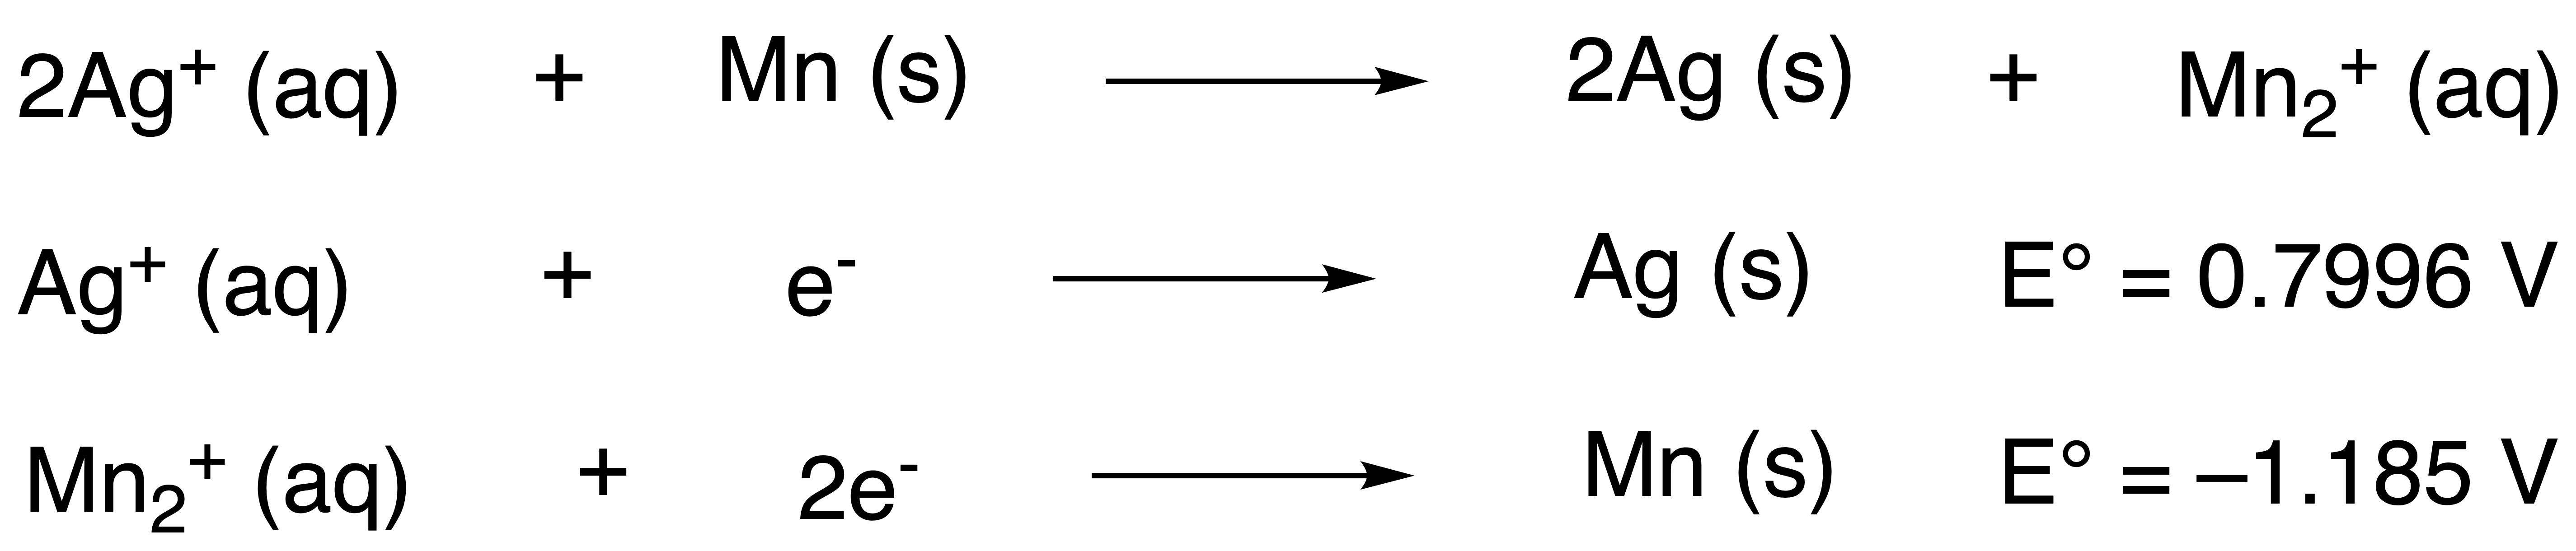

In [ ]:
# write the rest of the code


**C**. The source code of a function is given, but is written poorly. The function and variable names are cryptic and there is no annotation. Retain the behavior of the function, but update it in a readable way. Use the updated function to solve the following problem: 3-Hydroxy-1-(naphthalen-1-yl)pent-4-en-1-one ($C_{15}H_{14}O_2$) was synthesized. The exact mass of the sodiated adduct was determined to be $249.0881$ via high resolution mass spectrometry (HRMS). Determine whether or not the measurement is consistent with calculated exact mass. \[10\]


In [ ]:
exact_masses = {'C': 12.000000, 'H': 1.007825, 'O': 15.994915, 'N': 14.003074, 'Na': 22.989770}

def op(w, x, y, z):
    w + x + y + z
    x = 12.000000 * w + 1.007825 * x + 14.003074 * z + 15.994915 * y
    return x

def operation(x, y):
    return x - (y + 22.989770)


**D**. The radioactive decay of carbon-11 to boron-11 has a halflife of $20.364$ minutes. Radioactive decay follows first order kinetics, $N_t = N_0e^{-kt}$, for which $N_i$ is the number of atoms at time $i$, $k$ is the radioactive decay constant, and $t$ is time. The occupational value of carbon-11 dioxide derived air concentration (DAC) is $0.3 \frac{n Ci}{mL}$. Suppose a measurement of $0.03 \frac{n Ci}{mL}$ is considered acceptable at a workplace, however $0.17 \frac{n Ci}{mL}$ was measured. Operations need to be shut down for $51$ minutes to return to $0.03 \frac{n Ci}{mL}$, however something is wrong in the code below to calculate this. Debug the script.


In [ ]:
from math import log

def k_from_halflife(t_half):
    '''Calculate decay constant k from halflife in inverse time'''
    return - log(1/2 / (t_half))

def time_relative(fraction, k):
    '''Calculate the time taken for radioactive decay with decay constant k
    to achieve a fraction of the initial amount.'''
    return log(fraction)/ k

halflife = 20.364 # minutes
k = k_from_halflife(t_half):
time_shutdown = time_relative(0.03/0.17, k)
print(time_shutdown, 'minutes')

# Nivel 7

## Conditional Statements

**A**. We use the rectified linear unit (ReLU) is a popular activation function in deep learning. Activation functions introduce nonlinearity to the model. The ReLU function is show. Implement the ReLU function which accepts a scalar.

$$
    ReLU(x) = \left\lbrace\begin{array}{cc}
    x & \text{if } x > 0 \\
    0 & \text{otherwise}
    \end{array}\right.
$$

In [ ]:
# write the rest of the code


**B**. Chemical shifts measured on proton nuclear resonanse spectroscopy is correlated to functional groups. Write a function which returns possible functional groups based on a chemcial shift. Some functional groups and the interval in which they typically appear are listed.

- aliphatic: $0.5 - 2.0 ppm$
- allylic: $1.5 - 2.5 ppm$
- CH2-X: $2.5 - 4.5 ppm$
- ROH: $0.5 - 5.0 ppm$
- vinylic: $4.5 - 6.5 ppm$
- aromatic: $6.0 - 8.5 ppm$

In [ ]:
# write the rest of the code


## Loops

**A**. Write a function which accepts the whole number $i$, and returns the $i$th number in the Fibonacci sequence. The Fibonacci sequence is a sequence of natural numbers in which the $i$th entry is the sum of the $(i-2)$th and $(i-1)$th numbers. The first ten numbers of the Fibonacci sequence is: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55$.


In [ ]:
# write the rest of the code


**B**. Suppose we have analytically determined the diffusion coefficient at $24^\circ C$ to find the Stokes-Einstein radius of drug molecules in water. \[11\] Assume the molecules are spheres. Calculate the Stokes-Einstein radius for all compounds in a for-loop.

Stokes-Einstein equation for spherical system

$$
    R_H = \frac{k_B T}{6\pi \eta D}
$$

for which:
- $k_B$: Boltzmann's constant $\left(1.38 \times 10^{-23} \frac{J}{K}\right)$
- $T$: temperature
- $\eta$: viscosity of the liquid
- $D$: diffusion coefficient of ion

In [ ]:
drug_diffusion_coef = { # D in x10^(-6) cm^2/s
    'caffeine': 9.0,
    'calcein': 3.8,
    'chloramphenicol': 6.6,
    'ketoprofen': 6.4,
    'nitrofurantoin': 7.1,
    'paracetamol': 7.8,
    'penicillin G': 6.5,
    'tetracycline': 5.8,
    'trimethoprim': 5.6,
    'vancomycin': 2.9
}

# write the rest of the code


**C**. We previously identified the indices of PAM in the exons of *A. thaliana* transcription factor TRY for SpCas9. \[6\] Write a function which takes the sequence of the exon in lower case, and capitalizes all candidates for the guide RNA to recognize. The region must satisfy all of the following conditions:
- Located at the 5' end of the PAM (\<sequence\>-NGG or CCN-\<sequence\>)
- Is $20$ nucleotides long
- Does not contain four or more consecutive "T"s
- The GC content is $30-80\%$

In [ ]:
exon1 = 'ACAAAGTTAGCCTTCAAAATACTTACAAATCCCAATAAAAGACTTCATCTCCATGTGTATTTGAGTGTCAACGACAAGTCTACACAAAGGGTAAGAGGTCAACAAGACCACACAACACTTCTTACTATTAGTTTTGCAAAGGCCGTTCGTTGGACATTTCCTTCTCTCTCCTCCCCTCTTCTTCTTCTTGTTCGCTCTATAAACTCTCATCTCTCACGTCTTTTTTTCCTTACATTCTCCAAACTCAAAATTTCATCACATTAATTTCTCTCTATTTTTCTTTTCTTACTTCAATAGTAATGGATAACACTGACCGTCGTCGCCGTCGTAAGCAACACAAAATCGCCCTCCATGACTCTGAAG'
exon2 = 'AAGTGAGCAGTATCGAATGGGAGTTTATCAACATGACTGAACAAGAAGAAGATCTCATCTTTCGAATGTACAGACTTGTCGGTGATAG'
exon3 = 'GTGGGATTTGATAGCAGGAAGAGTTCCTGGAAGACAACCAGAGGAGATAGAGAGATATTGGATAATGAGAAACAGTGAAGGCTTTGCTGATAAACGACGCCAGCTTCACTCATCTTCCCACAAACATACCAAGCCTCACCGTCCTCGCTTTTCTATCTATCCTTCCTAGTGTTTTTGTTTTTAAGCCAACGAAAAAAGAAAATAAAAAAATTATAATAGATGTATAGTAGTGGTTCTTGTTAGTTTGAAGAATTCATCATCTATTGTTTTCTTTTTGTTGTTATTTCATTTATAATTTTTATAGTATAGGTTTCATTTGGTAATCAACTTTAATCCATGCGGTTAGGTTTTTTTATTTTCTCGTCTACGACTTTTATATCCACAACTAGATTTTAATCCGCGGTATATCGCGGTATAATTTACTTTTTAAAGTTAATATATATTAAAACTTG'

# write the rest of the code


**D**. You want to prototype the behavior of a automatic pH titrator, including a pH probe, $1 N$ hydrochloric acid pump, and $1 N$ sodium hydroxide pump connected to the same computer. You want an enzymatic reaction to proceed for one hour with pH on the range of $(7.0, 7.2)$. The pH should be measured in $30s$ increments if the pH is determined to be in the interval. If the pH goes out of range, add the appropriate solution dropwise to return to the pH range, over increments of $1s$. Use the provided functions to draft the behavior. Test the code by speeding up the time by $60$ orders. The pH flutuates by sampling from a Gaussian distribution every $30s$, purely for illustration.

In [ ]:
from time import time, sleep
from random import gauss

pH = 7.1
hcl_added = 0 # mL
naoh_added = 0 # mL
one_drop = 0.0648524 # mL

def add_hcl():
    '''use by: hcl_added, pH = add_hcl()
    This will update the record of added HCl and update the pH'''
    return hcl_added + one_drop, pH - 0.05

def add_naoh():
    '''use by: naoh_added, pH = add_naoh() '''
    return naoh_added + one_drop, pH + 0.05

times = {
    'reaction': 1 * 60 * 60, # s
    'in_range': 30, # s
    'out_range': 1 # s
}
# expedite the time by 60 fold
speedup = 60
times = {name:t / speedup for (name, t) in times.items()}

toc = time() # current time in s
one_second_counter = 0

tic = time() # current time in s

while (tic - toc) < times['reaction']:
    # if the pH is on range, wait 30s. pH fluctuates
    if pH > 7.0 and pH < 7.2:
        sleep(times['in_range'])
        pH += gauss(0, 0.05)
    # program behavior of the titrator off range from here
    # be sure to add one to one_second_counter if 1s elapses


    # complete the code



    # Once implemented the off-range behavior, test out the code
    # if 30 counts of the 1s counter are recorded, fluctuate the pH
    if one_second_counter == 30:
        # reset the counter
        one_second_counter = 0
        # fluctuate pH
        pH += gauss(0, 0.05)
    tic = time()
    time_elapsed = (tic - toc)/60 * speedup # min
    print('%.2f min   |   pH = %.2f' %(time_elapsed, pH))

print('reaction complete - program off')
print('HCl (1N) added: %.2f mL' %hcl_added)
print('NaOH (1N) added: %.2f mL' %naoh_added)


# Referencias

\[1\] Norio Miyaura, Kinji Yamada, and Akira Suzuki. A new stereospecific cross-coupling by the palladium-catalyzed reaction of 1-alkenylboranes with 1-alkenyl or 1-alkynyl halides. *Tetrahedron Letters*, 20(36):3437–3440, 1979.

\[2\] Dominik Mojzita, Merja Penttilä, and Peter Richard. Identification of an l-arabinose reductase gene in aspergillus niger and its role in l-arabinose catabolism. *Journal of biological chemistry*, 285(31):23622–23628, 2010.

\[3\] NK Boardman and SW Thorne. Sensitive fluorescence method for the determination of chlorophyll achlorophyll b ratios. *Biochimica et Biophysica Acta (BBA)-Bioenergetics*, 253(1):222–231, 1971.

\[4\] Bradley D Eyre, Tyler Cyronak, Patrick Drupp, Eric Heinen De Carlo, Julian P Sachs, and Andreas J Andersson. Coral reefs will transition to net dissolving before end of century. *Science*, 359(6378):908–911, 2018.

\[5\] Arkady F Fradkov, Ying Chen, Li Ding, Ekaterina V Barsova, Mikhail V Matz, and Sergey A Lukyanov. Novel fluorescent protein from discosoma coral and its mutants possesses a unique far-red fluorescence. *FEBS letters*, 479(3):127–130, 2000.

\[6\] Ramona Grützner, Patrick Martin, Claudia Horn, Samuel Mortensen, Erin J Cram, Carolyn WT Lee-Parsons, Johannes Stuttmann, and Sylvestre Marillonnet. High-efficiency genome editing in plants mediated by a cas9 gene containing multiple introns. *Plant communications*, 2(2):100135, 2021.

\[7\] Gene \[Internet\]. Bethesda (MD): National Library of Medicine (US), National Center for Biotechnology Information; \[1988\] – . Gene ID: 835401, Arabidopsis thaliana Homeodomain-like superfamily protein (TRY), Chromosome: 5; \[cited 2022-01-08\]. Available from: https://www.ncbi.nlm.nih.gov/gene/835401.

\[8\] (a) Madushanka Manathunga, Yipu Miao, Dawei Mu, Andreas W Götz, and Kenneth M Merz Jr. Parallel implementation of density functional theory methods in the quantum interaction computational kernel program. *Journal of Chemical Theory and Computation*, 16(7):4315–4326, 2020. (b) M. Manathunga, C. Jin, V.W.D. Cruzeiro, J. Smith, K. Keipert, D. Pekurovsky, D. Mu, Y. Miao, X. He, K Ayers, E. Brothers, A.W. Götz, and K. M. Merz. Quick-21.03. URL: https://github.com/merzlab/QUICK.

\[9\] Ana Filipa Sequeira, Jeremy Turchetto, Natalie J Saez, Fanny Peysson, Laurie Ramond, Yoan Duhoo, Marilyne Blémont, Vânia O Fernandes, Luís T Gama, Luís MA Ferreira, and others. Gene design, fusion technology and tev cleavage conditions influence the purification of oxidized disulphide-rich venom peptides in escherichia coli. *Microbial cell factories*, 16(1):4, 2017.

\[10\] Rodney A Fernandes, Ashvin J Gangani, and Arpita Panja. Synthesis of 5-vinyl-2-isoxazolines by palladium-catalyzed intramolecular o-allylation of ketoximes. *Organic Letters*, 23(16):6227–6231, 2021.

\[11\] Massimiliano Pio Di Cagno, Fabrizio Clarelli, Jon Våbenø, Christina Lesley, Sokar Darsim Rahman, Jennifer Cauzzo, Erica Franceschinis, Nicola Realdon, and Paul C Stein. Experimental determination of drug diffusion coefficients in unstirred aqueous environments by temporally resolved concentration measurements. *Molecular pharmaceutics*, 15(4):1488–1494, 2018.
